In [4]:
from flair.models import TextClassifier
from flair.models.text_regression_model import TextRegressor
from flair.data import Sentence
from google.cloud import language_v1
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from textblob import TextBlob
import time
import pandas as pd
import numpy as np
from tqdm.notebook import tnrange,tqdm
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy import optimize
import os

In [2]:
os.getenv('FLAIR_CACHE_ROOT') 

'/media/joey/Samsung_T5/FLAIR_CACHE_ROOT/'

In [3]:
os.getenv('GOOGLE_APPLICATION_CREDENTIALS') 

'/home/joey/Documents/My Project-18621dd5653a.json'

In [ ]:
# testing

In [28]:
sentence = 'VADER is smart, handsome, and funny.'

In [31]:
sid = SentimentIntensityAnalyzer()

In [32]:
ss = sid.polarity_scores(sentence)
for k in sorted(ss):
    print('{0}: {1}, '.format(k, ss[k]), end='')
print()
print(ss['compound'])

compound: 0.8316, neg: 0.0, neu: 0.254, pos: 0.746, 
0.8316


In [29]:
blob = TextBlob(sentence)

for t in blob.sentences:
    print(t.sentiment)
    print(t.sentiment.polarity)

Sentiment(polarity=0.32142857142857145, subjectivity=0.8809523809523809)
0.32142857142857145


In [17]:
classifier = TextClassifier.load('sentiment')

2020-11-19 21:53:18,046 loading file /home/joey/.flair/models/sentiment-en-mix-distillbert_3.1.pt


In [25]:
s = Sentence('I dont have a dream.')
classifier.predict(s)
temp = str(s.get_labels()[0])
if temp.split()[0] == 'POSITIVE':
    flair_score = float(temp.split()[1][1:-1])
elif temp.split()[0] == 'NEGATIVE':
    flair_score = -1*float(temp.split()[1][1:-1])
else:
    print('empty')
print(flair_score)

-0.9997


In [90]:
client = language_v1.LanguageServiceClient()

In [10]:
document = language_v1.Document(content=sentence, type_=language_v1.Document.Type.PLAIN_TEXT)

sentiment = client.analyze_sentiment(request={'document': document}).document_sentiment

print(sentiment.score, sentiment.magnitude)

0.8999999761581421 0.8999999761581421


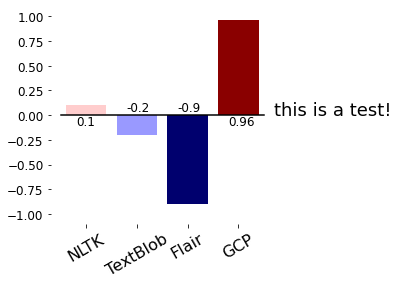

In [56]:
data = [0.1, -0.2, -0.9, 0.96]

cmap = mpl.cm.seismic
norm = mpl.colors.Normalize(vmin=-1, vmax=1)
width = 0.8

plt.figure(figsize = (4,4))
plt.bar(np.arange(4), data, width, color = cmap(norm(data)))

plt.plot([-0.5, 3.5], [0,0], color = 'black')
plt.ylim(-1.1, 1.1)
# ax = plt.gca()
# right_side = ax.spines["right"]
# right_side.set_visible(False)
plt.box(False)
plt.text(3.7, 0, 'this is a test!', fontsize = 18)
labels = ['NLTK', 'TextBlob', 'Flair', 'GCP']
for i in range(4):
    if data[i]>0:
        shift = -0.1
    elif data[i]<=0:
        shift = 0.04
    plt.text(i-0.2,shift, list(map(str,data))[i] , fontsize = 12)
plt.xticks(np.arange(4),labels,fontsize=16,rotation = 30)
plt.yticks(fontsize=12)
plt.show()

In [ ]:
# start 

In [169]:
sentences = ["It's a great day.", 
             "It's a great day", 
             "It's a great day!",
             "It's a great day?",
             "It's a great day!!!",
             "It's a GREAT day.",
             "IT'S A great DAY.",
             "IT'S A GREAT DAY.",
             "It's a great day. It's a great day.",
             "It's absolutely a great day.",
             "It's awfully a great day.",
             "It's ABSOLUTELY a great day.",
             "It's not a great day.",
             "It's absolutely not a great day!",
             "It's ABSOLUTELY not a great day.",
             "iT'S nOT a gREaT Day.",
             "day great not a It's.",
             "Ig'n yeo t tstaa adr.",
             "It'snotagreatday.",
             "It's not a great day :D",
             "It's not a great day :(",
             "It is not a great day.",
             "'It's not a great day.'",
             "(It's not a great day.)",
             "It's a great day. It's a bad day.",
             "It's a great day. (It's not.)",
             "Here is my number: (850)-100-1000",
             "Here is my number (850)-100-1000",
             "Please check out https://data.tallahassee.com/",
             "Contact me at jz17d@my.fsu.edu",
             "Couldn't agree more",
             "Couldnt agree more",
             "Today sucks",
             "Today sux",
             "Kinda sux today! But I'll get by",
             "OK",
             "Ok",
             "ok",
             "Thanks",
             "thanks",
             "THANKS",
             "Thank you",
             "thanks a lot",
             ":-(",
             ":(",
             ": (",
             "-",
             "------------------",
             "?",
             "!",
             ]

In [170]:
length = len(sentences)
length

50

In [171]:
nltk_raw = []
textblob_raw = []
flair_raw = []
GCP_raw = []

nltk_sentiment = []
textblob_sentiment = []
flair_sentiment = []
GCP_sentiment = []

In [172]:
for sentence in tqdm(sentences):
    # nltk
    score = sid.polarity_scores(sentence)
    temp_s = []
    for s in sorted(score):
        temp_s.append(score[s])
    nltk_raw.append(temp_s)
    nltk_sentiment.append(score['compound'])
    
    #textblob
    score = TextBlob(sentence)
    textblob_raw.append([score.sentiment.polarity, score.sentiment.subjectivity])
    textblob_sentiment.append(score.sentiment.polarity)
    
    #flair
    s = Sentence(sentence)
    classifier.predict(s)
    if s.get_labels() != []:
        temp = str(s.get_labels()[0])
        if temp.split()[0] == 'POSITIVE':
            flair_score = float(temp.split()[1][1:-1])
        elif temp.split()[0] == 'NEGATIVE':
            flair_score = -1*float(temp.split()[1][1:-1])
        else:
            print('error')
        flair_raw.append(str(s.get_labels()[0]))
        flair_sentiment.append(flair_score)
    else:
        flair_raw.append('empty')
        flair_sentiment.append(0)
    
    #GCP
    document = language_v1.Document(content=sentence, type_=language_v1.Document.Type.PLAIN_TEXT)
    sentiment = client.analyze_sentiment(request={'document': document}).document_sentiment
    GCP_raw.append([sentiment.score, sentiment.magnitude])
    GCP_sentiment.append(sentiment.score)


In [173]:
GCP_sentiment2 = list(map(str, GCP_sentiment))
for i in range(length):
    GCP_sentiment2[i] = GCP_sentiment2[i][:6]
GCP_sentiment2 = list(map(float, GCP_sentiment2))
GCP_sentiment2

[0.8999,
 0.8999,
 0.8999,
 0.6,
 0.8999,
 0.8999,
 0.8999,
 0.2,
 0.8999,
 0.8999,
 0.3,
 0.8999,
 -0.8,
 -0.8,
 -0.8,
 0.1,
 0.0,
 0.0,
 0.2,
 0.0,
 -0.899,
 -0.8,
 -0.699,
 -0.5,
 0.0,
 0.2,
 0.0,
 0.0,
 0.0,
 0.0,
 0.3,
 -0.1,
 -0.899,
 -0.899,
 -0.3,
 0.5,
 0.6999,
 0.6999,
 0.6999,
 0.8,
 0.8999,
 0.8,
 0.8999,
 -0.699,
 -0.699,
 -0.699,
 -0.1,
 0.1,
 0.0,
 0.3]

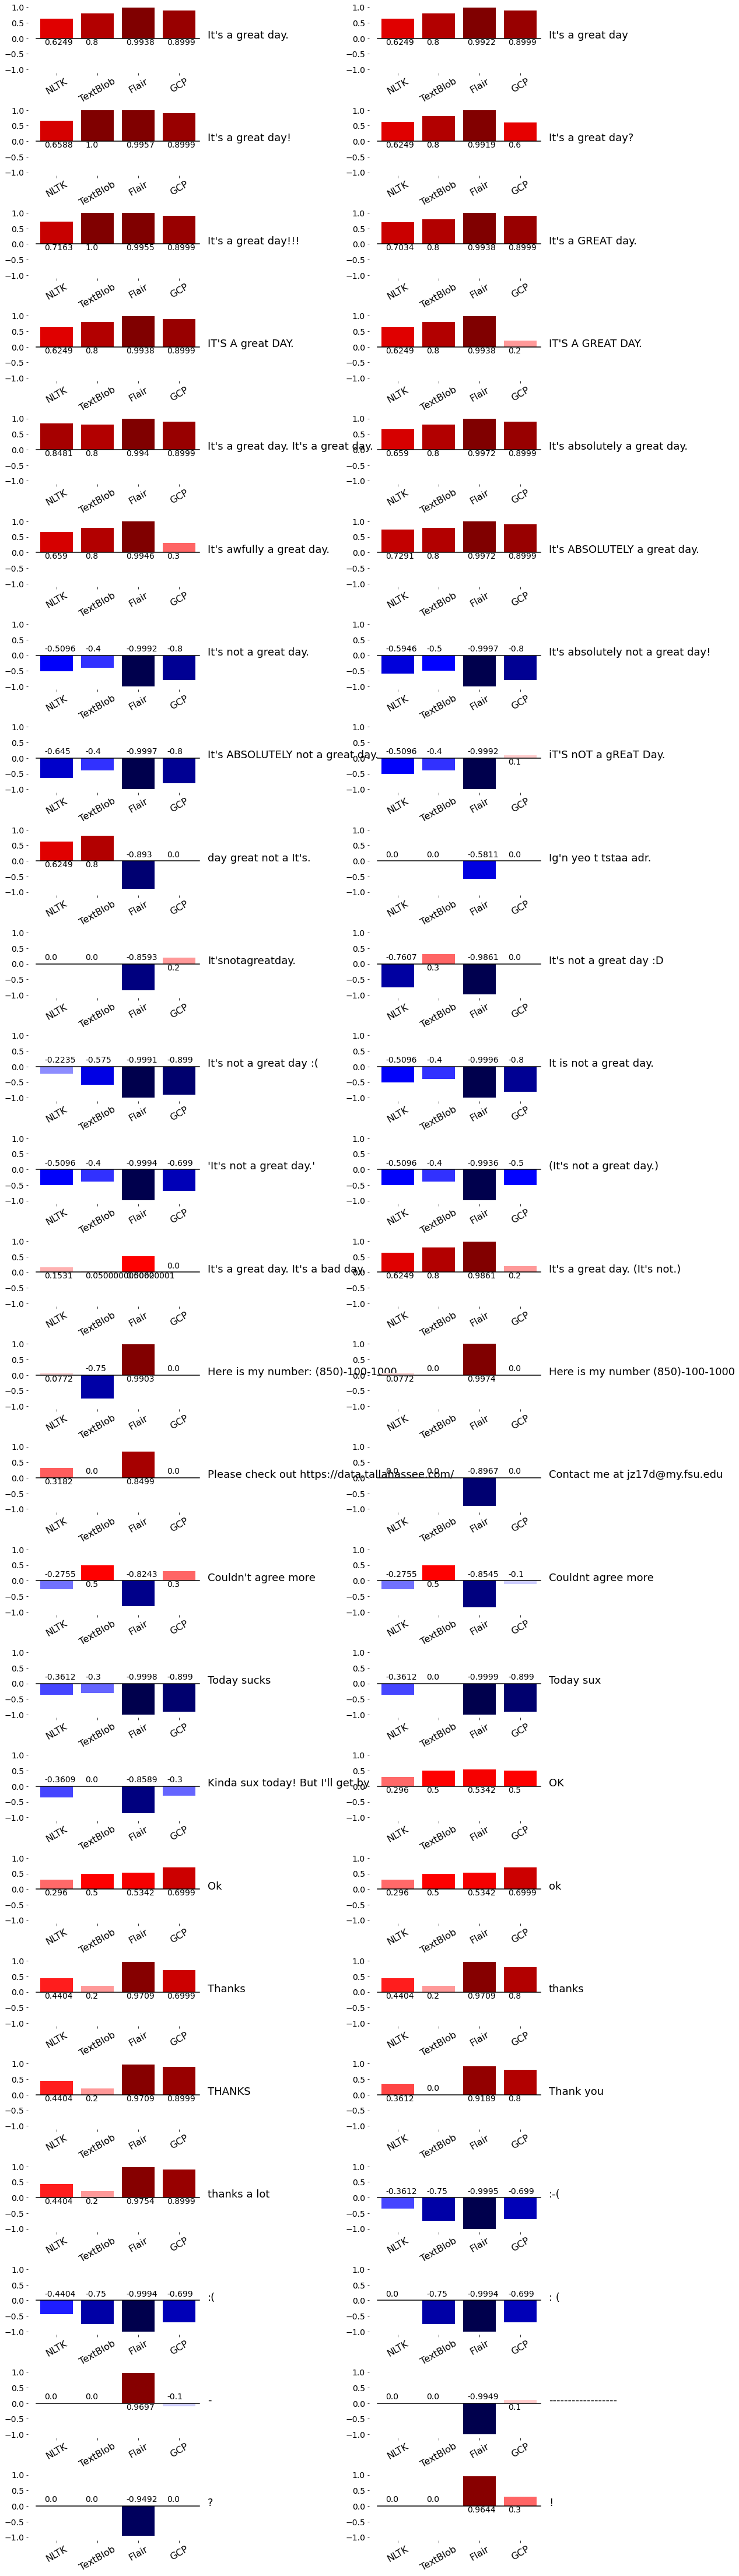

In [175]:
plt.figure(figsize = (15,28))
for i in range(7):
    plt.subplot(7,2,i+1)
    
    data = [nltk_sentiment[i], textblob_sentiment2[i], normalized_flair_sentiment[i], GCP_sentiment2[i]]

    cmap = mpl.cm.seismic
    norm = mpl.colors.Normalize(vmin=-1, vmax=1)
    width = 0.8


    plt.bar(np.arange(4), data, width, color = cmap(norm(data)))

    plt.plot([-0.5, 3.5], [0,0], color = 'black')
    plt.ylim(-1.1, 1.1)

    plt.box(False)
    plt.text(3.7, 0, sentences[i], fontsize = 18)
    labels = ['NLTK', 'TextBlob', 'Flair', 'GCP']
    for i in range(4):
        if data[i]>0:
            shift = -0.2
        elif data[i]<=0:
            shift = 0.13
        plt.text(i-0.3,shift, list(map(str,data))[i] , fontsize = 14)
    plt.xticks(np.arange(4),labels,fontsize=16,rotation = 30)
    plt.yticks(fontsize=14)
plt.subplots_adjust(wspace = 0.9, hspace = 0.5)
# plt.savefig('sentiment_comparison2.png')
plt.show()


In [176]:
df = pd.DataFrame(data=sentences, columns=['sentences'])

df['nltk_raw'] = nltk_raw 
df['textblob_raw'] = textblob_raw
df['flair_raw'] = flair_raw
df['GCP_raw'] = GCP_raw
df['nltk_sentiment'] = nltk_sentiment
df['textblob_sentiment'] = textblob_sentiment
df['flair_sentiment'] = flair_sentiment
df['GCP_sentiment'] = GCP_sentiment
df

,sentences,nltk_raw,textblob_raw,flair_raw,GCP_raw,nltk_sentiment,textblob_sentiment,flair_sentiment,GCP_sentiment
0,It's a great day.,"[0.6249, 0.0, 0.328, 0.672]","[0.8, 0.75]",POSITIVE (0.9938),"[0.8999999761581421, 0.8999999761581421]",0.6249,0.800,0.9938,0.9
1,It's a great day,"[0.6249, 0.0, 0.328, 0.672]","[0.8, 0.75]",POSITIVE (0.9922),"[0.8999999761581421, 0.8999999761581421]",0.6249,0.800,0.9922,0.9
2,It's a great day!,"[0.6588, 0.0, 0.313, 0.687]","[1.0, 0.75]",POSITIVE (0.9957),"[0.8999999761581421, 0.8999999761581421]",0.6588,1.000,0.9957,0.9
3,It's a great day?,"[0.6249, 0.0, 0.328, 0.672]","[0.8, 0.75]",POSITIVE (0.9919),"[0.6000000238418579, 0.6000000238418579]",0.6249,0.800,0.9919,0.6
4,It's a great day!!!,"[0.7163, 0.0, 0.287, 0.713]","[1.0, 0.75]",POSITIVE (0.9955),"[0.8999999761581421, 0.8999999761581421]",0.7163,1.000,0.9955,0.9
5,It's a GREAT day.,"[0.7034, 0.0, 0.293, 0.707]","[0.8, 0.75]",POSITIVE (0.9938),"[0.8999999761581421, 0.8999999761581421]",0.7034,0.800,0.9938,0.9
6,IT'S A great DAY.,"[0.6249, 0.0, 0.328, 0.672]","[0.8, 0.75]",POSITIVE (0.9938),"[0.8999999761581421, 0.8999999761581421]",0.6249,0.800,0.9938,0.9
7,IT'S A GREAT DAY.,"[0.6249, 0.0, 0.328, 0.672]","[0.8, 0.75]",POSITIVE (0.9938),"[0.20000000298023224, 0.20000000298023224]",0.6249,0.800,0.9938,0.2
8,It's a great day. It's a great day.,"[0.8481, 0.0, 0.328, 0.672]","[0.8, 0.75]",POSITIVE (0.994),"[0.8999999761581421, 1.899999976158142]",0.8481,0.800,0.9940,0.9
9,It's absolutely a great day.,"[0.659, 0.0, 0.406, 0.594]","[0.8, 0.75]",POSITIVE (0.9972),"[0.8999999761581421, 0.8999999761581421]",0.6590,0.800,0.9972,0.9


In [177]:
df.to_csv('sentiment_comparison.csv')

conclusion

|          | word order | space           | punctuation | capitalization    | repetitoin | emoji    | idioms |   |
|----------|------------|-----------------|-------------|-------------------|------------|----------|----------------|---|
| nltk     | matter     | matter          | sometimes   | sometimes         | matter     | fallible | not good       |   |
| textblob | matter     | matter          | sometimes   | rarely & fallible | not matter | fallible | not good       |   |
| flair    | matter     | slightly matter | matter      | not matter        | matter     | perfect  | not good       |   |
| GCP      | matter     | matter          | rarely      | rarely & fallible | not matter | perfect  | not good       |   |

# updates Dec 4

In [9]:
df = pd.read_csv('sentiment_comparison.csv',index_col=0)
length = len(df)

In [5]:
sid = SentimentIntensityAnalyzer()
classifier = TextClassifier.load('sentiment')
client = language_v1.LanguageServiceClient()

2020-12-03 22:53:28,867 loading file /home/joey/.flair/models/sentiment-en-mix-distillbert_3.1.pt


In [18]:
sentence = 'It\'s not not a great day.'

In [33]:
new_row = []
new_row.append(sentence)
# nltk
score1 = sid.polarity_scores(sentence)
temp_s = []
for s in sorted(score1):
    temp_s.append(score1[s])
new_row.append(temp_s)


#textblob
score = TextBlob(sentence)
new_row.append([score.sentiment.polarity, score.sentiment.subjectivity])


#flair
s = Sentence(sentence)
classifier.predict(s)
if s.get_labels() != []:
    temp = str(s.get_labels()[0])
    if temp.split()[0] == 'POSITIVE':
        flair_score = float(temp.split()[1][1:-1])
    elif temp.split()[0] == 'NEGATIVE':
        flair_score = -1*float(temp.split()[1][1:-1])
    else:
        print('error')
    new_row.append(str(s.get_labels()[0]))
else:
    new_row.append('empty')
    new_row.append(0)

#GCP
document = language_v1.Document(content=sentence, type_=language_v1.Document.Type.PLAIN_TEXT)
sentiment = client.analyze_sentiment(request={'document': document}).document_sentiment
new_row.append([sentiment.score, sentiment.magnitude])



new_row.append(score1['compound'])
new_row.append(score.sentiment.polarity)
new_row.append(flair_score)
new_row.append(sentiment.score)


In [34]:
new_row

["It's not not a great day.",
 [0.4014, 0.0, 0.597, 0.403],
 [-0.4, 0.75],
 'NEGATIVE (0.9997)',
 [-0.5, 0.5],
 0.4014,
 -0.4,
 -0.9997,
 -0.5]

In [39]:
# 

In [40]:
sentence = 'It\'s not not not not a great day.'

In [41]:
new_row = []
new_row.append(sentence)
# nltk
score1 = sid.polarity_scores(sentence)
temp_s = []
for s in sorted(score1):
    temp_s.append(score1[s])
new_row.append(temp_s)


#textblob
score = TextBlob(sentence)
new_row.append([score.sentiment.polarity, score.sentiment.subjectivity])


#flair
s = Sentence(sentence)
classifier.predict(s)
if s.get_labels() != []:
    temp = str(s.get_labels()[0])
    if temp.split()[0] == 'POSITIVE':
        flair_score = float(temp.split()[1][1:-1])
    elif temp.split()[0] == 'NEGATIVE':
        flair_score = -1*float(temp.split()[1][1:-1])
    else:
        print('error')
    new_row.append(str(s.get_labels()[0]))
else:
    new_row.append('empty')
    new_row.append(0)

#GCP
document = language_v1.Document(content=sentence, type_=language_v1.Document.Type.PLAIN_TEXT)
sentiment = client.analyze_sentiment(request={'document': document}).document_sentiment
new_row.append([sentiment.score, sentiment.magnitude])



new_row.append(score1['compound'])
new_row.append(score.sentiment.polarity)
new_row.append(flair_score)
new_row.append(sentiment.score)


In [42]:
# insert_at = 13
# line = pd.DataFrame([new_row],columns = df.columns,index=[insert_at])
# df = pd.concat([df.iloc[:insert_at], line, df.iloc[insert_at:]]).reset_index(drop=True)

In [6]:
normalized_flair_sentiment = df['flair_sentiment'].values

array([ 0.9876,  0.9844,  0.9914,  0.9838,  0.991 ,  0.9876,  0.9876,
        0.9876,  0.988 ,  0.9944,  0.9892,  0.9944, -0.9994, -0.9986,
       -0.9984, -0.9994, -0.9994, -0.9984, -0.786 , -0.1622, -0.7186,
       -0.9722, -0.9982, -0.9992, -0.9988, -0.9872,  0.0124,  0.9722,
        0.9806,  0.9948,  0.6998, -0.7934, -0.6486, -0.709 , -0.9996,
       -0.9998, -0.7178,  0.0684,  0.0684,  0.0684,  0.9418,  0.9418,
        0.9418,  0.8378,  0.9508, -0.999 , -0.9988, -0.9988,  0.9394,
       -0.9898, -0.8984,  0.9288])

In [11]:
df['normalized_flair_sentiment'] = normalized_flair_sentiment2

In [12]:
df.to_csv('sentiment_comparison.csv')

In [13]:
sentences = df['sentences']

In [14]:
length = len(df)

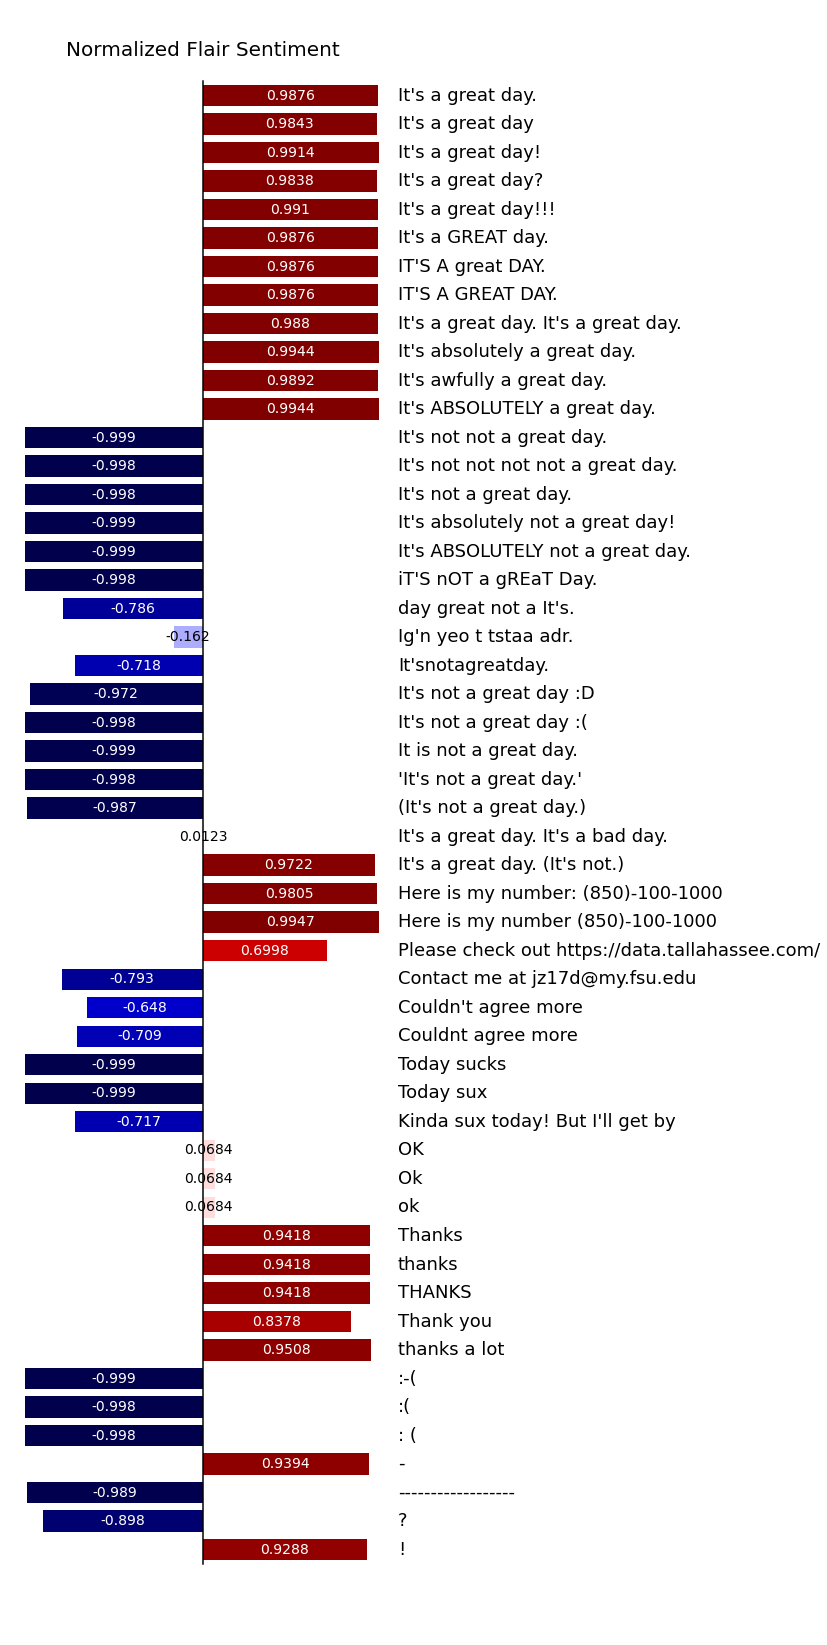

In [15]:
plt.figure(figsize = (7,30))
plt.title('Normalized Flair Sentiment', fontsize = 20, y=0.97, pad=0)

data = normalized_flair_sentiment2

cmap = mpl.cm.seismic
norm = mpl.colors.Normalize(vmin=-1, vmax=1)
width = 0.75


plt.barh(np.arange(length), data, width, color = cmap(norm(data)))

plt.plot([0,0],[-0.5, length-0.5], color = 'black')
plt.xlim(-1.1, 1.1)
plt.gca().invert_yaxis()
plt.box(False)
for i in range(length):
    plt.text(1.1, i, sentences[i], fontsize = 18, horizontalalignment='left', verticalalignment='center')

    if data[i]>0:
        shift = -0.2
    elif data[i]<=0:
        shift = 0.13
    if np.abs(data[i])<0.3:
        color = 'black'
    else:
        color = 'white'
    plt.text(data[i]/2, i, list(map(str,data))[i] , fontsize = 14, color = color, horizontalalignment='center', verticalalignment='center',)

plt.axis('off')
plt.savefig('normalized_flair_sentiment.png')
plt.subplots_adjust(wspace = 0.0, hspace = 0.5)
plt.show()


In [16]:
sentences = ['It\'s not not a great day.',
             'It\'s not not not not a great day.',
             'The fruit doesn\'t taste good, does it? Yes.',
             'You don\'t say!',
             'He was only too pleased to let them go.',
             'We cannot be too patient with others.',
             'Well, I\'ve certainly never tasted chicken cooked that way before!'
             ]

In [17]:
nltk_raw = []
textblob_raw = []
flair_raw = []
GCP_raw = []

nltk_sentiment = []
textblob_sentiment = []
flair_sentiment = []
GCP_sentiment = []

In [18]:
for sentence in tqdm(sentences):
    # nltk
    score = sid.polarity_scores(sentence)
    temp_s = []
    for s in sorted(score):
        temp_s.append(score[s])
    nltk_raw.append(temp_s)
    nltk_sentiment.append(score['compound'])
    
    #textblob
    score = TextBlob(sentence)
    textblob_raw.append([score.sentiment.polarity, score.sentiment.subjectivity])
    textblob_sentiment.append(score.sentiment.polarity)
    
    #flair
    s = Sentence(sentence)
    classifier.predict(s)
    if s.get_labels() != []:
        temp = str(s.get_labels()[0])
        if temp.split()[0] == 'POSITIVE':
            flair_score = float(temp.split()[1][1:-1])
        elif temp.split()[0] == 'NEGATIVE':
            flair_score = -1*float(temp.split()[1][1:-1])
        else:
            print('error')
        flair_raw.append(str(s.get_labels()[0]))
        flair_sentiment.append(flair_score)
    else:
        flair_raw.append('empty')
        flair_sentiment.append(0)
    
    #GCP
    document = language_v1.Document(content=sentence, type_=language_v1.Document.Type.PLAIN_TEXT)
    sentiment = client.analyze_sentiment(request={'document': document}).document_sentiment
    GCP_raw.append([sentiment.score, sentiment.magnitude])
    GCP_sentiment.append(sentiment.score)


In [22]:
GCP_sentiment2 = list(map(str, GCP_sentiment))
for i in range(7):
    GCP_sentiment2[i] = GCP_sentiment2[i][:6]
GCP_sentiment2 = list(map(float, GCP_sentiment2))
GCP_sentiment2

[-0.5, 0.1, 0.0, -0.3, 0.0, -0.1, -0.1]

In [33]:
normalized_flair_sentiment = np.array(flair_sentiment)
normalized_flair_sentiment = (2*(normalized_flair_sentiment>0)-1) * (np.abs(normalized_flair_sentiment)*2-1)
normalized_flair_sentiment = list(map(str, normalized_flair_sentiment))
for i in range(7):
    normalized_flair_sentiment[i] = normalized_flair_sentiment[i][:6]
normalized_flair_sentiment = list(map(float, normalized_flair_sentiment))
normalized_flair_sentiment

[-0.999, -0.998, -0.999, -0.743, -0.983, 0.9026, -0.626]

In [30]:
textblob_sentiment2 = list(map(str, textblob_sentiment))
for i in range(7):
    textblob_sentiment2[i] = textblob_sentiment2[i][:6]
textblob_sentiment2 = list(map(float, textblob_sentiment2))

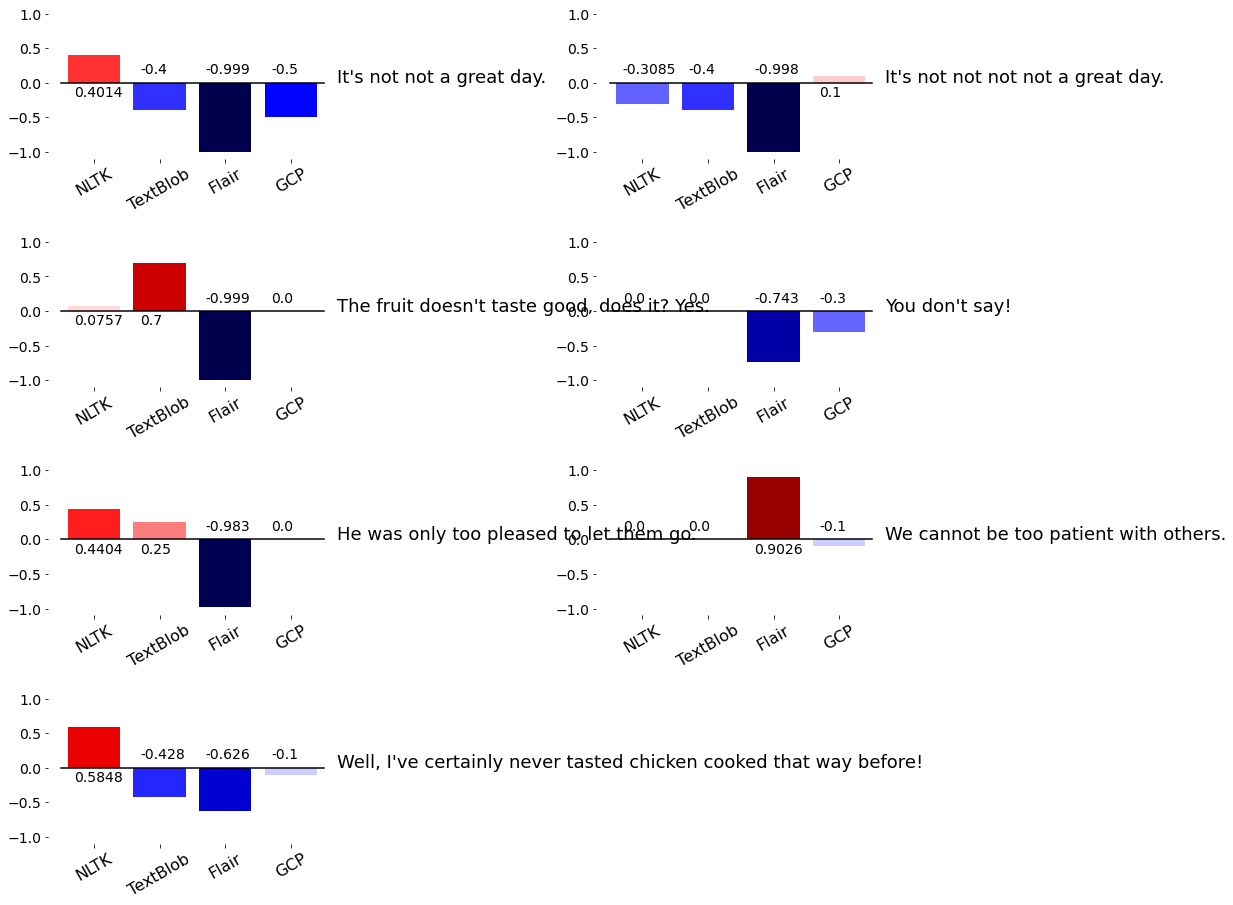

In [34]:
plt.figure(figsize = (15,28))
for i in range(7):
    plt.subplot(7,2,i+1)
    
    data = [nltk_sentiment[i], textblob_sentiment2[i], normalized_flair_sentiment[i], GCP_sentiment2[i]]

    cmap = mpl.cm.seismic
    norm = mpl.colors.Normalize(vmin=-1, vmax=1)
    width = 0.8


    plt.bar(np.arange(4), data, width, color = cmap(norm(data)))

    plt.plot([-0.5, 3.5], [0,0], color = 'black')
    plt.ylim(-1.1, 1.1)

    plt.box(False)
    plt.text(3.7, 0, sentences[i], fontsize = 18)
    labels = ['NLTK', 'TextBlob', 'Flair', 'GCP']
    for i in range(4):
        if data[i]>0:
            shift = -0.2
        elif data[i]<=0:
            shift = 0.13
        plt.text(i-0.3,shift, list(map(str,data))[i] , fontsize = 14)
    plt.xticks(np.arange(4),labels,fontsize=16,rotation = 30)
    plt.yticks(fontsize=14)
plt.subplots_adjust(wspace = 0.9, hspace = 0.5)
# plt.savefig('sentiment_comparison2.png')
plt.show()


# GCP topic 

In [156]:
df = pd.read_csv('output6_triplets_names.csv',index_col = 0)
df['Sent'] = pd.to_datetime(df['Sent'])
df


,From,Sent,To,CC,Subject,Attachments,Importance,Body,textblob_sentiment,nltk_sentiment
0,"('cindy', 'dick', 'cynthia.dick@talgov.com')",2011-08-18 12:12:00,"[('fire', 'department', 'fire_department')]",[],[],[],[],['I recently came across this quote and reflec...,"[0.275, 0.39583333333333337]","[0.0, 0.149, 0.701, 0.149]"
1,"('mark', 'decarlo', 'mark.decarlo@talgov.com')",2011-08-20 03:44:00,"[('fire', 'department', 'fire_department')]",[],[],[],[],[''],"[0.0, 0.0]","[0.0, 0.0, 0.0, 0.0]"
2,"('deborah', 'heiter', 'deborah.heiter@talgov.c...",2012-01-20 16:41:00,"[('bill', 'behenna', 'bill_behenna'), ('cathy'...",[],[],[],[],"['', 'Deborah L. Heiter', 'Administrative Spec...","[0.07253787878787879, 0.3424242424242424]","[0.9318, 0.0, 0.93, 0.07]"
3,"('beth', 'kirkland', 'bkirkland@taledc.com')",2012-01-23 09:32:00,"[('f496', 'l496', 'llaubscher@eflorida.com')]","[('f18020', 'l18020', 'brook.pace@deo.myflorid...",[],[],[],"['Louis,', 'Thank you for meeting with us in F...","[0.012500000000000011, 0.36944444444444446]","[0.9599, 0.021, 0.847, 0.132]"
4,"('vida', 'addison', 'vida.addison@talgov.com')",2012-02-07 15:19:00,"[(""gary yordon' no, they have not told me anyt...",[],[],[],[],"['Hello, Do you have a 4meline for when a deci...","[0.021875000000000006, 0.403125]","[0.8708, 0.0, 0.879, 0.121]"
...,...,...,...,...,...,...,...,...,...,...
21809,"('gina', 'fletcher', 'gfletcher@leonpa.org')",2017-09-26 11:12:00,"[('vince', 'long', 'longv@leoncountyfl.gov'), ...","[('f22301', 'l22301', 'rosss@leoncountyfl.gov'...",[],[],"[""High Good morning, everyone! I have been c...",[],"[0.0, 0.0]","[0.0, 0.0, 0.0, 0.0]"
21810,"('alison', 'faris', 'alison.faris@talgov.com')",2017-09-26 11:20:00,"[('suzanne', 'hughes', 'suzanneh@floridarealto...","[('paige', 'carter-smith', 'paige.tallahasseed...",[],[],[],"['', 'Thanks for leqng us know about your plan...","[0.2333333333333333, 0.4000000000000001]","[0.9001, 0.0, 0.842, 0.158]"
21811,"('suzanne', 'hughes', 'suzanneh@floridarealtor...",2017-09-26 13:41:00,"[('alison', 'faris', 'afaris@comcast.net')]","[('paige', 'carter-smith', 'paige.tallahasseed...",[],[],[],"['', '', 'Great! And yes, wed love to let eve...","[0.625, 0.5166666666666667]","[0.9421, 0.0, 0.377, 0.623]"
21812,"('edward', 'kring', 'edward.kring@talgov.com')",2017-09-26 17:48:00,"[('suzanne', 'hughes', 'suzanneh@floridarealto...","[('paige', 'carter-smith', 'paige.tallahasseed...",[],[],[],"['', 'HI Suzanne I hope this nds you well. Pl...","[-0.75, 1.0]","[0.891, 0.0, 0.741, 0.259]"


In [166]:
bodies = df['Body'].values.tolist()
idx_list = []
for i in range(len(bodies)):
    bodies[i] = ' '.join(eval(bodies[i]))
    if len(bodies[i].split()) > 21:
        idx_list.append(i)
df['Bodyinaline']= bodies


In [167]:
df_new = df.iloc[idx_list]
df_new = df_new.reset_index(drop=True)
df_new

,From,Sent,To,CC,Subject,Attachments,Importance,Body,textblob_sentiment,nltk_sentiment,Bodyinaline
0,"('cindy', 'dick', 'cynthia.dick@talgov.com')",2011-08-18 12:12:00,"[('fire', 'department', 'fire_department')]",[],[],[],[],['I recently came across this quote and reflec...,"[0.275, 0.39583333333333337]","[0.0, 0.149, 0.701, 0.149]",I recently came across this quote and reflecte...
1,"('deborah', 'heiter', 'deborah.heiter@talgov.c...",2012-01-20 16:41:00,"[('bill', 'behenna', 'bill_behenna'), ('cathy'...",[],[],[],[],"['', 'Deborah L. Heiter', 'Administrative Spec...","[0.07253787878787879, 0.3424242424242424]","[0.9318, 0.0, 0.93, 0.07]",Deborah L. Heiter Administrative Specialist I...
2,"('beth', 'kirkland', 'bkirkland@taledc.com')",2012-01-23 09:32:00,"[('f496', 'l496', 'llaubscher@eflorida.com')]","[('f18020', 'l18020', 'brook.pace@deo.myflorid...",[],[],[],"['Louis,', 'Thank you for meeting with us in F...","[0.012500000000000011, 0.36944444444444446]","[0.9599, 0.021, 0.847, 0.132]","Louis, Thank you for meeting with us in Ft. La..."
3,"('vida', 'addison', 'vida.addison@talgov.com')",2012-02-07 15:19:00,"[(""gary yordon' no, they have not told me anyt...",[],[],[],[],"['Hello, Do you have a 4meline for when a deci...","[0.021875000000000006, 0.403125]","[0.8708, 0.0, 0.879, 0.121]","Hello, Do you have a 4meline for when a decisi..."
4,"('gary', 'yordon', 'gary@govinc.net')",2012-02-08 15:15:00,"[('john', 'cox', 'john.cox@talgov.com')]",[],[],[],[],"['Hello John, I know there is a commiYee proc...","[0.13333333333333333, 0.16666666666666666]","[0.6486, 0.0, 0.928, 0.072]","Hello John, I know there is a commiYee proces..."
...,...,...,...,...,...,...,...,...,...,...,...
17800,"('edward', 'kring', 'edward.kring@talgov.com')",2017-09-21 11:33:00,"[(',', '', 'christinal@bingenergyinc.com'), ('...","[(""paige.tallahasseedowntown@gmail.com, faris,...",[],[],[],"['Eddie,', 'The owner of Midtown Manor request...","[0.0, 0.0]","[-0.4215, 0.13, 0.796, 0.074]","Eddie, The owner of Midtown Manor requested th..."
17801,"('suzanne', 'hughes', 'suzanneh@floridarealtor...",2017-09-26 10:58:00,"[('alison', 'faris', 'alison.faris@talgov.com')]",[],[],[],[],['Hi Alison. Hope you are doing well. Are yo...,"[0.03333333333333333, 0.22777777777777777]","[0.7777, 0.0, 0.947, 0.053]",Hi Alison. Hope you are doing well. Are you ...
17802,"('alison', 'faris', 'alison.faris@talgov.com')",2017-09-26 11:20:00,"[('suzanne', 'hughes', 'suzanneh@floridarealto...","[('paige', 'carter-smith', 'paige.tallahasseed...",[],[],[],"['', 'Thanks for leqng us know about your plan...","[0.2333333333333333, 0.4000000000000001]","[0.9001, 0.0, 0.842, 0.158]",Thanks for leqng us know about your plans. I ...
17803,"('edward', 'kring', 'edward.kring@talgov.com')",2017-09-26 17:48:00,"[('suzanne', 'hughes', 'suzanneh@floridarealto...","[('paige', 'carter-smith', 'paige.tallahasseed...",[],[],[],"['', 'HI Suzanne I hope this nds you well. Pl...","[-0.75, 1.0]","[0.891, 0.0, 0.741, 0.259]",HI Suzanne I hope this nds you well. Please ...


In [173]:
df_new.iloc[10]

From                       ('rick', 'oppenheim', 'roppenheim@rboa.com')
Sent                                                2012-02-21 16:48:00
To                              [('gary', 'yordon', 'gary@govinc.net')]
CC                    [('michelle', 'bono', 'michelle.bono@talgov.co...
Subject                                                              []
Attachments                                                          []
Importance                                                           []
Body                  ['', 'This en4re process is a crock of (dog) p...
textblob_sentiment                                           [0.2, 0.3]
nltk_sentiment                            [-0.3597, 0.053, 0.92, 0.027]
Bodyinaline            This en4re process is a crock of (dog) poop a...
Name: 10, dtype: object

In [175]:
# from google.cloud import language_v1
client = language_v1.LanguageServiceClient()
type_ = language_v1.Document.Type.PLAIN_TEXT
language = "en"

def sample_classify_text(text_content):

    document = {"content": text_content, "type_": type_, "language": language}

    response = client.classify_text(request = {'document': document})
    categories = []
    confidences = []
    # Loop through classified categories returned from the API
    for category in response.categories:
        # Get the name of the category representing the document.
        # See the predefined taxonomy of categories:
        # https://cloud.google.com/natural-language/docs/categories
#         print(u"Category name: {}".format(category.name))
        categories.append(category.name)
        # Get the confidence. Number representing how certain the classifier
        # is that this category represents the provided text.
#         print(u"Confidence: {}".format(category.confidence))
        confidences.append(category.confidence)
    return categories, confidences

In [153]:
sample_classify_text("President-elect Joe Biden told CNN's Jake Tapper on Thursday that he will ask Americans to wear masks for the first 100 days after he takes office, in a sign of how Biden's approach to the virus will be dramatically different from President Donald Trump's response.")

Category name: /News/Politics
Confidence: 0.9800000190734863
Category name: /Law & Government/Government
Confidence: 0.5199999809265137


In [179]:
topics = []
bodyinaline = df_new['Bodyinaline']
for body in tqdm(bodyinaline):
    time.sleep(0.2)
    topics.append(sample_classify_text(body))

In [184]:
df_new['topic_raw'] = topics

In [188]:
t = []
for topic in topics:
    if topic!=([],[]):
        t = t+topic[0]

In [185]:
topics[0]

([], [])

In [186]:
['a'] + []

['a']

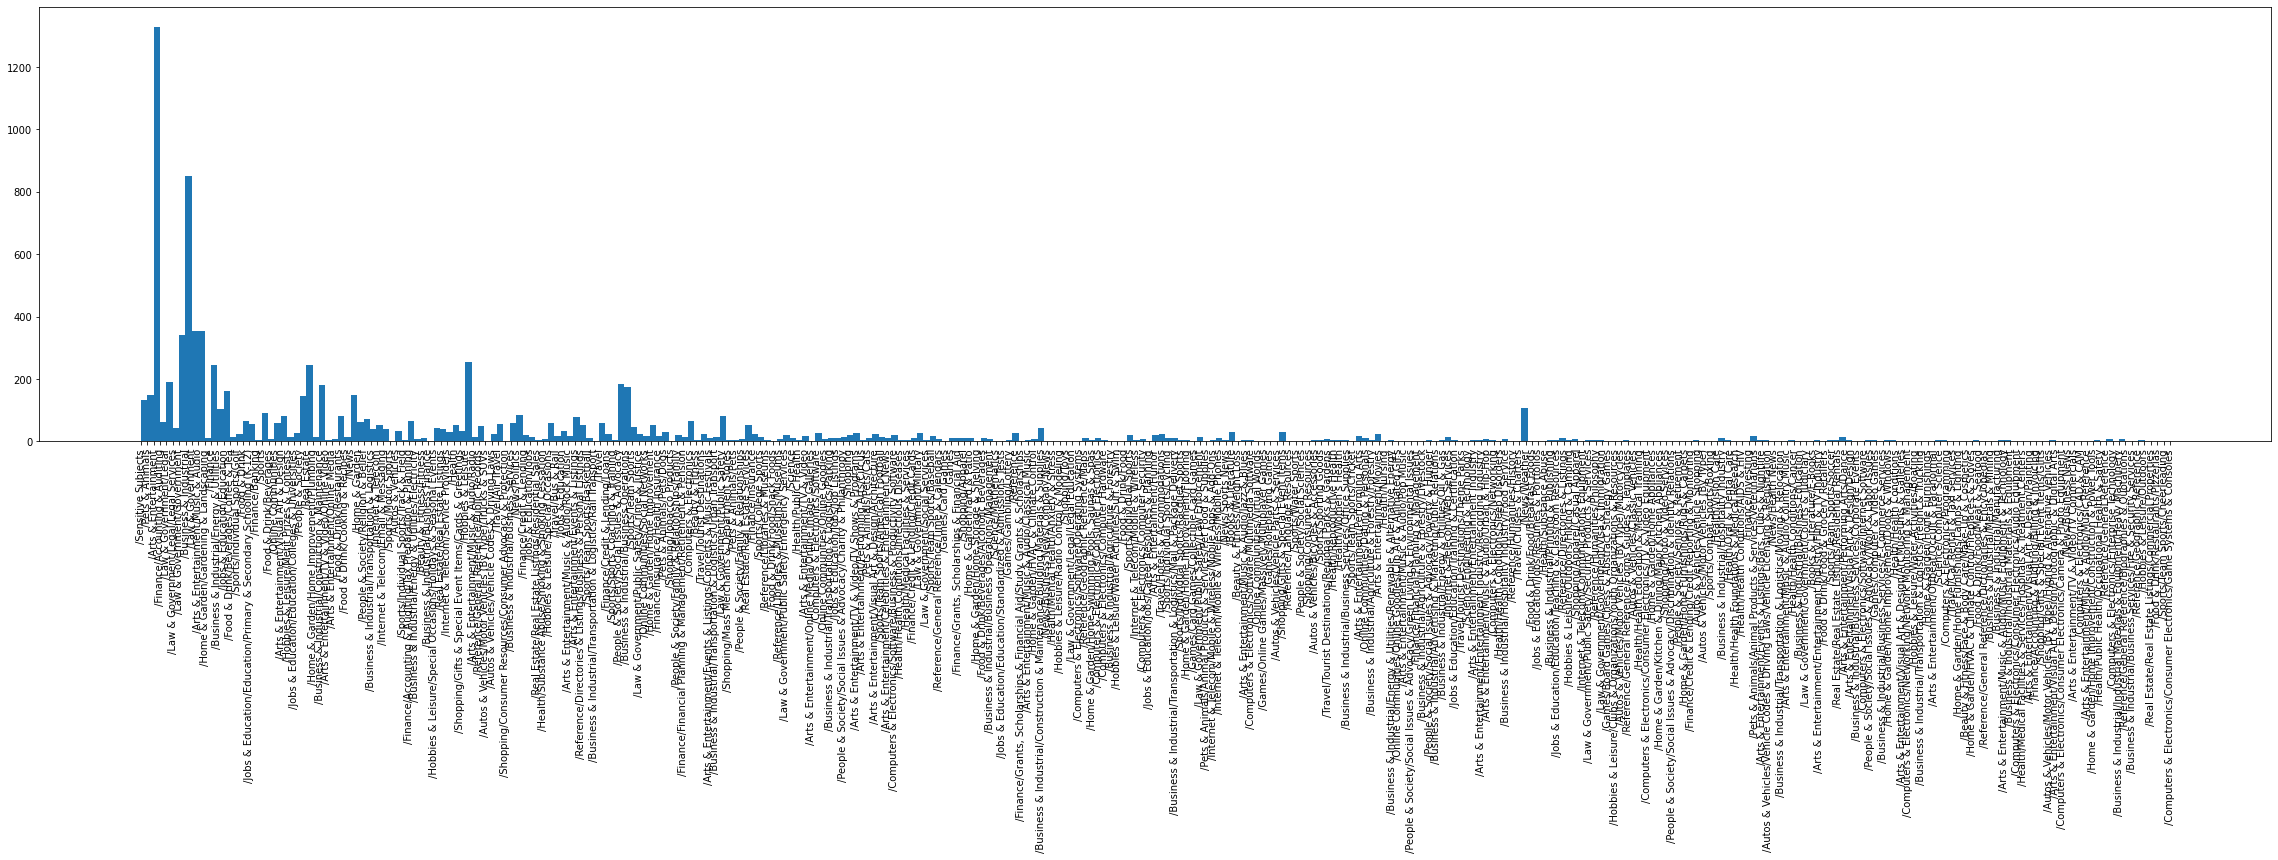

In [203]:
plt.figure(figsize = (40,8))
plt.hist(t,bins=319)
plt.xticks(rotation='vertical')
plt.show()

In [193]:
dic = {} 
count, itm = 0, '' 
for item in reversed(t): 
    dic[item] = dic.get(item, 0) + 1

In [201]:
res = sorted(dic.items(), key = lambda x: x[1], reverse = True)[:5] 

In [202]:
res

[('/Arts & Entertainment', 1327),
 ('/Business & Industrial', 849),
 ('/Arts & Entertainment/Music & Audio', 354),
 ('/Law & Government', 354),
 ('/Law & Government/Government', 340)]

# abnormality

In [35]:
df2 = pd.read_csv('output6_triplets_names.csv',index_col = 0)
df2['Sent'] = pd.to_datetime(df2['Sent'])
df2 = df2.drop_duplicates(subset=['Sent','From'])
df2 = df2.reset_index(drop=True)

In [83]:
year_list = df2['Sent'].dt.year
month_list = df2['Sent'].dt.month
dayofyear_list = df2['Sent'].dt.dayofyear

In [38]:
dayofyear_list.min()

1

In [70]:
textblob_sentiment = df2['textblob_sentiment'].values.tolist()
for i in range(len(textblob_sentiment)):
    textblob_sentiment[i] = eval(textblob_sentiment[i])
textblob_sentiment = np.array(textblob_sentiment)

nltk_sentiment = df2['nltk_sentiment'].values.tolist()
for i in range(len(nltk_sentiment)):
    nltk_sentiment[i] = eval(nltk_sentiment[i])
nltk_sentiment = np.array(nltk_sentiment)

In [71]:
textblob_sentiment_by_day = np.zeros((365*6,2))
nltk_sentiment_by_day = np.zeros((365*6,4))
textblob_sentiment_by_day_avg = np.zeros((365*6,2))
nltk_sentiment_by_day_avg = np.zeros((365*6,4))
email_counts_by_day=np.zeros(365*6)

textblob_sentiment2 = []
nltk_sentiment2 = []

for i in range(len(year_list)):
    year_idx = year_list[i]-2012
    dayofyear_idx = dayofyear_list[i]-1
    idx = year_idx*365 + dayofyear_idx
    textblob_sentiment2.append([idx, textblob_sentiment[i,0]])
    nltk_sentiment2.append([idx, nltk_sentiment[i,0]])
    
    textblob_sentiment_by_day[idx, :] += textblob_sentiment[i,:]
    nltk_sentiment_by_day[idx, :] += nltk_sentiment[i,:]
    email_counts_by_day[idx] += 1
    
textblob_sentiment2 = np.array(textblob_sentiment2).T
nltk_sentiment2 = np.array(nltk_sentiment2).T

for i in range(365*6):
    if email_counts_by_day[i] != 0:
        textblob_sentiment_by_day_avg[i,:] = textblob_sentiment_by_day[i,:] / email_counts_by_day[i]
        nltk_sentiment_by_day_avg[i,:] = nltk_sentiment_by_day[i,:] / email_counts_by_day[i]        

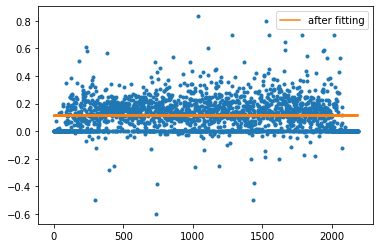

In [72]:
t = np.linspace(0, 6*365, 6*365)

def test_func(x, a, b, c, d):
    return a * np.sin(b * x + c) + d

params, params_covariance = optimize.curve_fit(test_func, t, textblob_sentiment_by_day_avg[:,0],
                                               p0=[2, 365/2/np.pi, 1, 0])


data_fit= test_func(t, params[0], params[1], params[2], params[3])

plt.plot(t, textblob_sentiment_by_day_avg[:,0], '.')
plt.plot(t, data_fit, label='after fitting')
plt.legend()
plt.show()


In [84]:
textblob_sentiment_by_month=np.zeros((6,12,2))
textblob_sentiment_by_month_avg=np.zeros((6,12,2))

nltk_sentiment_by_month=np.zeros((6,12,4))
nltk_sentiment_by_month_avg=np.zeros((6,12,4))

email_counts_by_month=np.zeros((6,12))

for i in range(len(month_list)):
    year_idx = year_list[i]-2012
    month_idx = month_list[i]-1
    if textblob_sentiment[i,0] != 0 or textblob_sentiment[i,1] != 0:
        textblob_sentiment_by_month[year_idx, month_idx, :] += textblob_sentiment[i,:]
    if nltk_sentiment[i,1] != 0 or nltk_sentiment[i,2] != 0 or nltk_sentiment[i,3] != 0:
        nltk_sentiment_by_month[year_idx, month_idx, :] += nltk_sentiment[i,:]    
        email_counts_by_month[year_idx, month_idx] += 1
for i in range(6):
    for j in range(12):
        if email_counts_by_month[i,j] != 0:
            textblob_sentiment_by_month_avg[i,j,:] = textblob_sentiment_by_month[i,j,:] / email_counts_by_month[i,j]
            nltk_sentiment_by_month_avg[i,j,:] = nltk_sentiment_by_month[i,j,:] / email_counts_by_month[i,j]        

In [85]:
textblob_polarity_by_year = []
textblob_subjectivity_by_year = []
textblob_polarity_by_month = []
textblob_subjectivity_by_month = []

nltk_compound_by_year = []
nltk_negative_by_year = []
nltk_neutral_by_year = []
nltk_positive_by_year = []
nltk_compound_by_month = []
nltk_negative_by_month = []
nltk_neutral_by_month = []
nltk_positive_by_month = []

for i in range(6):
    textblob_polarity_by_year.append([])
    textblob_subjectivity_by_year.append([])
    nltk_compound_by_year.append([])
    nltk_negative_by_year.append([])
    nltk_neutral_by_year.append([])
    nltk_positive_by_year.append([])   
    for j in range(12):
        textblob_polarity_by_month.append([])
        textblob_subjectivity_by_month.append([])
        nltk_compound_by_month.append([])
        nltk_negative_by_month.append([])
        nltk_neutral_by_month.append([])
        nltk_positive_by_month.append([])   
        
for i in range(len(month_list)):
    year_idx = year_list[i]-2012
    month_idx = year_idx*12 + (month_list[i]-1)
    if year_idx >= 7:
        continue
    if textblob_sentiment[i,0] != 0 or textblob_sentiment[i,1] != 0:
        textblob_polarity_by_year[year_idx].append(textblob_sentiment[i,0])
        textblob_subjectivity_by_year[year_idx].append(textblob_sentiment[i,1])
        textblob_polarity_by_month[month_idx].append(textblob_sentiment[i,0])
        textblob_subjectivity_by_month[month_idx].append(textblob_sentiment[i,1])
    
    if nltk_sentiment[i,1] != 0 or nltk_sentiment[i,2] != 0 or nltk_sentiment[i,3] != 0:
        nltk_compound_by_year[year_idx].append(nltk_sentiment[i,0])
        nltk_negative_by_year[year_idx].append(nltk_sentiment[i,1])
        nltk_neutral_by_year[year_idx].append(nltk_sentiment[i,2])
        nltk_positive_by_year[year_idx].append(nltk_sentiment[i,3])
        nltk_compound_by_month[month_idx].append(nltk_sentiment[i,0])
        nltk_negative_by_month[month_idx].append(nltk_sentiment[i,1])
        nltk_neutral_by_month[month_idx].append(nltk_sentiment[i,2])
        nltk_positive_by_month[month_idx].append(nltk_sentiment[i,3])

# textblob_by_year = []

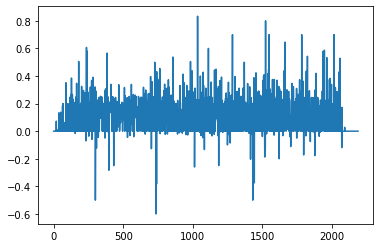

In [68]:
plt.plot(t, textblob_sentiment_by_day_avg[:,0])

In [92]:
textblob_sentiment_by_month_avg = textblob_sentiment_by_month_avg.reshape(-1,2)
textblob_sentiment_by_month_avg.shape

(72, 2)

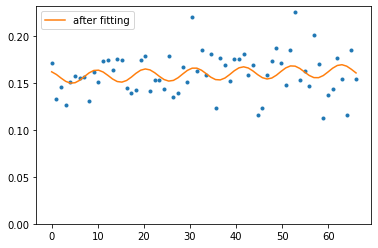

In [121]:
t = np.linspace(0, 66, 66)

def test_func(x, a, b, c, d, e, f, g):
    return a * np.sin(b * x + c) + d*x + e * np.sin(b * x + f) + g

params, params_covariance = optimize.curve_fit(test_func, t, textblob_sentiment_by_month_avg[2:68,0],
                                               p0=[2, 2*np.pi/12, 0.44, 0, 0.3, 0, 0.15])


data_fit= test_func(t, params[0], params[1], params[2], params[3], params[4], params[5], params[6])

plt.plot(t, textblob_sentiment_by_month_avg[2:68,0], '.')
plt.plot(t, data_fit, label='after fitting')
plt.legend()
plt.ylim(0,)
plt.show()


In [118]:
params

array([-2.03698796,  0.58505777, -0.29327049,  0.4926245 ,  2.03082415,
        5.99154543, -0.33292215])

In [142]:

x = torch.unsqueeze(torch.linspace(0, 65, 66), dim=1)
y = torch.from_numpy(textblob_sentiment_by_month_avg[2:68,0].reshape(-1,1))

In [143]:
x.shape

torch.Size([66, 1])

In [144]:
y.shape

torch.Size([66, 1])

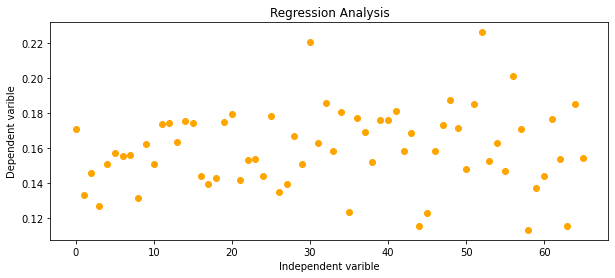

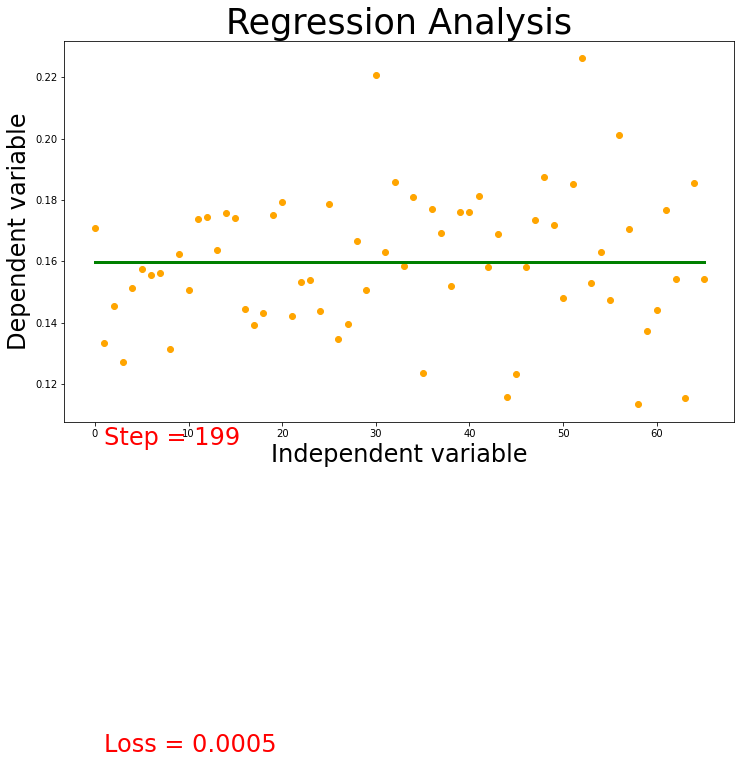

In [147]:
import torch
from torch.autograd import Variable
import torch.nn.functional as F
import torch.utils.data as Data

import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import imageio


torch.manual_seed(1)    # reproducible

x = torch.unsqueeze(torch.linspace(0, 65, 66), dim=1).float()
y = torch.from_numpy(textblob_sentiment_by_month_avg[2:68,0].reshape(-1,1)).float()
# x = torch.unsqueeze(torch.linspace(-1, 1, 100), dim=1)  # x data (tensor), shape=(100, 1)
# y = x.pow(2) + 0.2*torch.rand(x.size())                 # noisy y data (tensor), shape=(100, 1)


# torch can only train on Variable, so convert them to Variable
x, y = Variable(x), Variable(y)

# view data
plt.figure(figsize=(10,4))
plt.scatter(x.data.numpy(), y.data.numpy(), color = "orange")
plt.title('Regression Analysis')
plt.xlabel('Independent varible')
plt.ylabel('Dependent varible')
plt.show()

# this is one way to define a network
class Net(torch.nn.Module):
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net, self).__init__()
        self.hidden = torch.nn.Linear(n_feature, n_hidden)   # hidden layer
        self.predict = torch.nn.Linear(n_hidden, n_output)   # output layer

    def forward(self, x):
        x = F.relu(self.hidden(x))      # activation function for hidden layer
        x = self.predict(x)             # linear output
        return x

net = Net(n_feature=1, n_hidden=10, n_output=1)     # define the network
# print(net)  # net architecture
optimizer = torch.optim.SGD(net.parameters(), lr=0.2)
loss_func = torch.nn.MSELoss()  # this is for regression mean squared loss

my_images = []
fig, ax = plt.subplots(figsize=(12,7))

# train the network
for t in range(200):
  
    prediction = net(x)     # input x and predict based on x

    loss = loss_func(prediction, y)     # must be (1. nn output, 2. target)

    optimizer.zero_grad()   # clear gradients for next train
    loss.backward()         # backpropagation, compute gradients
    optimizer.step()        # apply gradients
    
    # plot and show learning process
    plt.cla()
    ax.set_title('Regression Analysis', fontsize=35)
    ax.set_xlabel('Independent variable', fontsize=24)
    ax.set_ylabel('Dependent variable', fontsize=24)
#     ax.set_xlim(-1.05, 1.5)
#     ax.set_ylim(-0.25, 1.25)
    ax.scatter(x.data.numpy(), y.data.numpy(), color = "orange")
    ax.plot(x.data.numpy(), prediction.data.numpy(), 'g-', lw=3)
    ax.text(1.0, 0.1, 'Step = %d' % t, fontdict={'size': 24, 'color':  'red'})
    ax.text(1.0, 0, 'Loss = %.4f' % loss.data.numpy(),
            fontdict={'size': 24, 'color':  'red'})

    # Used to return the plot as an image array 
    # (https://ndres.me/post/matplotlib-animated-gifs-easily/)
    fig.canvas.draw()       # draw the canvas, cache the renderer
    image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
    image  = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))

    my_images.append(image)

# save images as a gif    
imageio.mimsave('./curve_1.gif', my_images, fps=10)


# updates Jan 29

In [ ]:
regressor = TextRegressor.load('model/sentiment_regressor/best-model.pt')

In [37]:
s = Sentence("I like this movie very much!")
regressor.predict(s)
str(s.get_labels()[0]).split()[0][1:-1]

'2.2032575607299805'

In [31]:
s = Sentence("")
regressor.predict(s)
s.get_labels()

2021-01-28 20:22:12,951 Warning: An empty Sentence was created! Are there empty strings in your dataset?
2021-01-28 20:22:12,951 Ignore 1 sentence(s) with no tokens.


[]

In [69]:
sentences = ["It's a great day.", 
             "It's a terrible day.", 
             "It's a great day!!!!!",
             "It's a GREAT day.",
             "It's a great day! It's a great day!",
             ":)",
             "Today sux",
             "It s a great day.",
             "It's a greeat day.",
             "It's a gret day.",
             ]

In [22]:
sid = SentimentIntensityAnalyzer()
# textblob don't need to load model first
client = language_v1.LanguageServiceClient()
classifier = TextClassifier.load('sentiment')
regressor = TextRegressor.load('model/sentiment_regressor/best-model.pt')

2021-01-28 20:18:21,995 https://nlp.informatik.hu-berlin.de/resources/models/sentiment-curated-distilbert/sentiment-en-mix-distillbert_3.1.pt not found in cache, downloading to /tmp/tmptkcxp5qi


100%|██████████| 266147697/266147697 [00:42<00:00, 6251509.99B/s]

2021-01-28 20:19:05,196 copying /tmp/tmptkcxp5qi to cache at /media/joey/Samsung_T5/FLAIR_CACHE_ROOT/models/sentiment-en-mix-distillbert_3.1.pt


2021-01-28 20:19:05,330 removing temp file /tmp/tmptkcxp5qi
2021-01-28 20:19:05,351 loading file /media/joey/Samsung_T5/FLAIR_CACHE_ROOT/models/sentiment-en-mix-distillbert_3.1.pt
2021-01-28 20:19:17,228 loading file model/sentiment_regressor/best-model.pt
2021-01-28 20:19:18,218 Using REGRESSION - experimental


In [70]:
nltk_raw = []
textblob_raw = []
flair_raw = []
GCP_raw = []
charac_raw = []

nltk_sentiment = []
textblob_sentiment = []
flair_sentiment = []
GCP_sentiment = []
charac_sentiment = []

In [71]:
for sentence in tqdm(sentences):
    # nltk
    score = sid.polarity_scores(sentence)
    temp_s = []
    for s in sorted(score):
        temp_s.append(score[s])
    nltk_raw.append(temp_s)
    nltk_sentiment.append(score['compound'])
    
    #textblob
    score = TextBlob(sentence)
    textblob_raw.append([score.sentiment.polarity, score.sentiment.subjectivity])
    textblob_sentiment.append(score.sentiment.polarity)
    
    #flair
    s = Sentence(sentence)
    classifier.predict(s)
    if s.get_labels() != []:
        temp = str(s.get_labels()[0])
        if temp.split()[0] == 'POSITIVE':
            flair_score = float(temp.split()[1][1:-1])
            flair_score = (flair_score*2)-1
        elif temp.split()[0] == 'NEGATIVE':
            flair_score = float(temp.split()[1][1:-1])
            flair_score = -1*((flair_score*2)-1)
        else:
            print('error')
        
        flair_raw.append(str(s.get_labels()[0]))
        flair_sentiment.append(flair_score)
    else:
        flair_raw.append('empty')
        flair_sentiment.append(0)
    
    #GCP
    document = language_v1.Document(content=sentence, type_=language_v1.Document.Type.PLAIN_TEXT)
    sentiment = client.analyze_sentiment(request={'document': document}).document_sentiment
    GCP_raw.append([sentiment.score, sentiment.magnitude])
    GCP_sentiment.append(sentiment.score)
    
    #charac
    s = Sentence(sentence)
    regressor.predict(s)
    if s.get_labels() != []:
        temp = str(str(s.get_labels()[0]))
        charac_raw_score = float(temp.split()[0][1:-1])
        if charac_raw_score > 4:
            charac_raw_score = 4.0
        elif charac_raw_score < 0:
            charac_raw_score = 0
        charac_score = charac_raw_score/2 - 1
        charac_raw.append(charac_raw_score)
        charac_sentiment.append(charac_score)
    else:
        charac_raw.append('empty')
        charac_sentiment.append(0)

In [72]:
df = pd.DataFrame(data=sentences, columns=['sentences'])

df['nltk_raw'] = nltk_raw 
df['textblob_raw'] = textblob_raw
df['flair_raw'] = flair_raw
df['GCP_raw'] = GCP_raw
df['charac_raw'] = charac_raw

df['nltk_sentiment'] = nltk_sentiment
df['textblob_sentiment'] = textblob_sentiment
df['flair_sentiment'] = flair_sentiment
df['GCP_sentiment'] = GCP_sentiment
df['charac_sentiment'] = charac_sentiment
df

,sentences,nltk_raw,textblob_raw,flair_raw,GCP_raw,charac_raw,nltk_sentiment,textblob_sentiment,flair_sentiment,GCP_sentiment,charac_sentiment
0,It's a great day.,"[0.6249, 0.0, 0.328, 0.672]","[0.8, 0.75]",POSITIVE (0.9938),"[0.8999999761581421, 0.8999999761581421]",3.100856,0.6249,0.8,0.9876,0.9,0.550428
1,It's a terrible day.,"[-0.4767, 0.608, 0.392, 0.0]","[-1.0, 1.0]",NEGATIVE (1.0),"[-0.800000011920929, 0.800000011920929]",1.094925,-0.4767,-1.0,-1.0000,-0.8,-0.452537
2,It's a great day!!!!!,"[0.7405, 0.0, 0.275, 0.725]","[1.0, 0.75]",POSITIVE (0.9954),"[0.8999999761581421, 0.8999999761581421]",3.454002,0.7405,1.0,0.9908,0.9,0.727001
3,It's a GREAT day.,"[0.7034, 0.0, 0.293, 0.707]","[0.8, 0.75]",POSITIVE (0.9938),"[0.8999999761581421, 0.8999999761581421]",3.019807,0.7034,0.8,0.9876,0.9,0.509903
4,It's a great day! It's a great day!,"[0.8684, 0.0, 0.313, 0.687]","[1.0, 0.75]",POSITIVE (0.9958),"[0.8999999761581421, 1.899999976158142]",3.565658,0.8684,1.0,0.9916,0.9,0.782829
5,:),"[0.4588, 0.0, 0.0, 1.0]","[0.5, 1.0]",POSITIVE (0.9772),"[0.800000011920929, 0.800000011920929]",2.023962,0.4588,0.5,0.9544,0.8,0.011981
6,Today sux,"[-0.3612, 0.714, 0.286, 0.0]","[0.0, 0.0]",NEGATIVE (0.9999),"[-0.8999999761581421, 0.8999999761581421]",2.206433,-0.3612,0.0,-0.9998,-0.9,0.103217
7,It s a great day.,"[0.6249, 0.0, 0.328, 0.672]","[0.8, 0.75]",POSITIVE (0.9899),"[0.8999999761581421, 0.8999999761581421]",2.838021,0.6249,0.8,0.9798,0.9,0.419011
8,It's a greeat day.,"[0.0, 0.0, 1.0, 0.0]","[0.0, 0.0]",POSITIVE (0.9953),"[0.0, 0.0]",2.418764,0.0000,0.0,0.9906,0.0,0.209382
9,It's a gret day.,"[0.0, 0.0, 1.0, 0.0]","[0.0, 0.0]",POSITIVE (0.9988),"[0.0, 0.0]",2.409254,0.0000,0.0,0.9976,0.0,0.204627


In [73]:
df.to_csv("sentiment_comparison_with_charac.csv")

In [74]:
length = len(sentences)

In [75]:
# too many precision digits
textblob_sentiment2 = list(map(str, textblob_sentiment))
for i in range(length):
    textblob_sentiment2[i] = textblob_sentiment2[i][:6]
textblob_sentiment2 = list(map(float, textblob_sentiment2))

flair_sentiment2 = list(map(str, flair_sentiment))
for i in range(length):
    flair_sentiment2[i] = flair_sentiment2[i][:6]
flair_sentiment2 = list(map(float, flair_sentiment2))

GCP_sentiment2 = list(map(str, GCP_sentiment))
for i in range(length):
    GCP_sentiment2[i] = GCP_sentiment2[i][:6]
GCP_sentiment2 = list(map(float, GCP_sentiment2))

charac_sentiment2 = list(map(str, charac_sentiment))
for i in range(length):
    charac_sentiment2[i] = charac_sentiment2[i][:6]
charac_sentiment2 = list(map(float, charac_sentiment2))

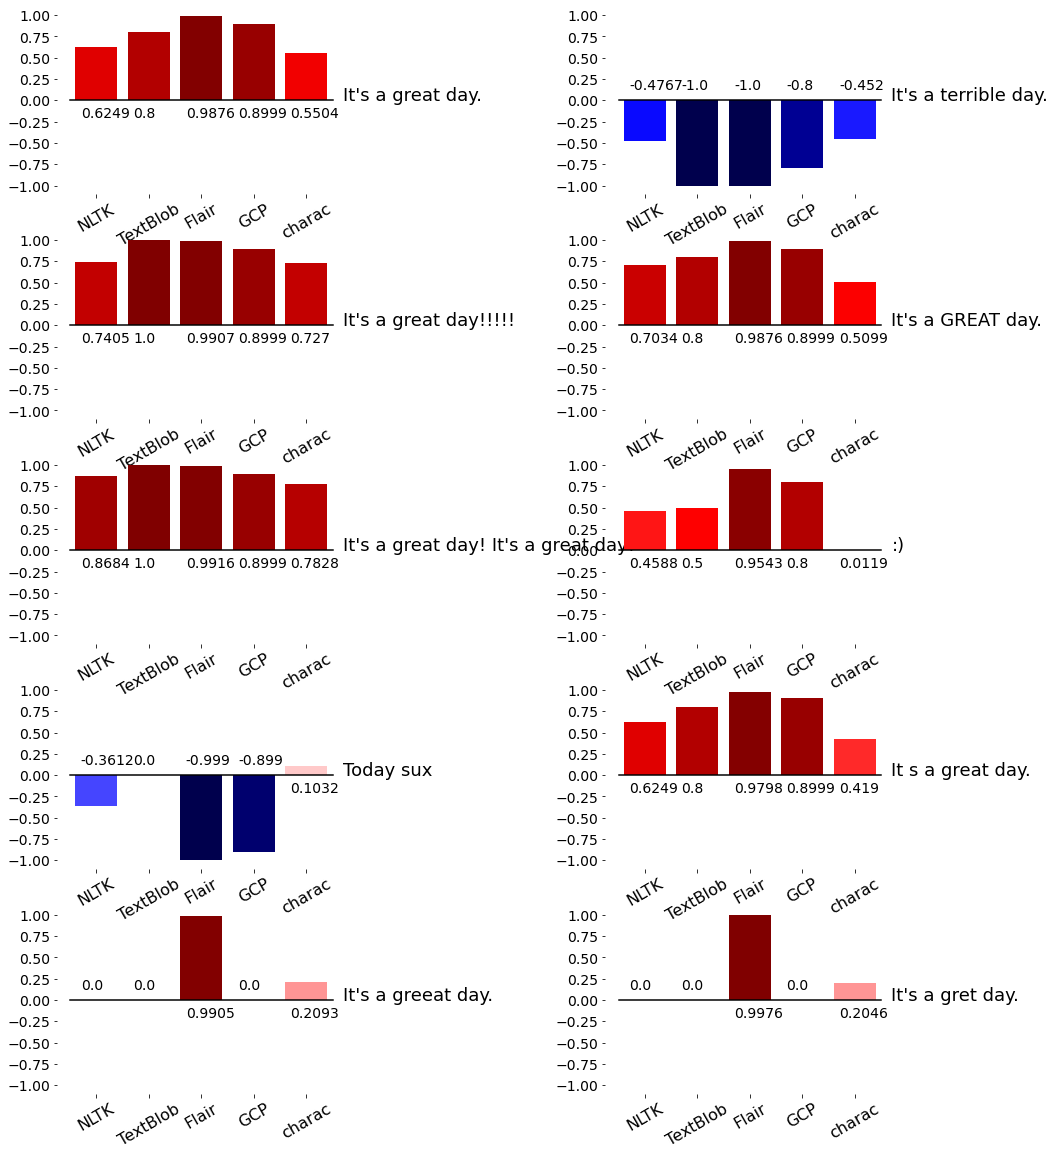

In [82]:
plt.figure(figsize = (15,20))
for i in range(length):
    plt.subplot(int(length/2),2,i+1)
    
    data = [nltk_sentiment[i], textblob_sentiment2[i], flair_sentiment2[i], GCP_sentiment2[i], charac_sentiment2[i]]

    cmap = mpl.cm.seismic
    norm = mpl.colors.Normalize(vmin=-1, vmax=1)
    width = 0.8


    plt.bar(np.arange(5), data, width, color = cmap(norm(data)))

    plt.plot([-0.5, 4.5], [0,0], color = 'black')
    plt.ylim(-1.1, 1.1)

    plt.box(False)
    plt.text(4.7, 0, sentences[i], fontsize = 18)
    labels = ['NLTK', 'TextBlob', 'Flair', 'GCP', 'charac']
    for j in range(5):
        if data[j]>0:
            shift = -0.2
        elif data[j]<=0:
            shift = 0.13
        plt.text(j-0.3,shift, list(map(str,data))[j] , fontsize = 14)
    plt.xticks(np.arange(5),labels,fontsize=16,rotation = 30)
    plt.yticks(fontsize=14)
plt.subplots_adjust(wspace = 0.9, hspace = 0.2)
# plt.savefig('sentiment_comparison2.png')
plt.show()


In [78]:
s = Sentence("It's a great day.")
regressor.predict(s)
str(s.get_labels()[0]).split()[0][1:-1]


'3.100855827331543'

In [80]:
s = Sentence("It's a great day!")
regressor.predict(s)
str(s.get_labels()[0]).split()[0][1:-1]


'3.1391921043395996'

In [81]:
s = Sentence("It's a GREAT day!")
regressor.predict(s)
str(s.get_labels()[0]).split()[0][1:-1]


'3.040034532546997'

In [77]:
s = Sentence("It'sagreatday.")
regressor.predict(s)
str(s.get_labels()[0]).split()[0][1:-1]

'1.926113247871399'

In [79]:
s = Sentence("a It's day great.")
regressor.predict(s)
str(s.get_labels()[0]).split()[0][1:-1]

'2.8763015270233154'

In [83]:
s = Sentence("Couldn't agree more")
regressor.predict(s)
str(s.get_labels()[0]).split()[0][1:-1]

'1.562509298324585'

## conclusion

|          | word order | space           | punctuation | capitalization    | repetitoin | emoji | idioms | **typos** |
|----------|------------|-----------------|-------------|-------------------|------------|----------|----------------|---|
| nltk     | matter     | matter          | sometimes   | sometimes         | matter     | not good | bad | **bad** |
| textblob | matter     | matter          | sometimes   | not matter        | not matter | not good | bad | **bad** |
| flair    | matter     | slightly matter | matter      | not matter        | matter    | perfect | ok | **perfect** |
| GCP      | matter     | matter          | sometimes   | sometimes & not good | not matter | perfect | ok | **bad** |
| **this character model** | matter | matter | matter   | not good          | matter     | bad  | bad | **ok** |